# Lineare Separierbarkeit

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Datengrundlage

In [2]:
x = np.random.normal(0,1,size=(2000,3))
linear_separable = np.where((x[:,:1]+x[:,1:2])>1,1,0)
not_linear_separable = np.where((x[:,:1]*x[:,1:2])>1,1,0)

linear_separable_3d = np.where((x[:,:1]+x[:,1:2]+x[:,2:])>1,1,0)
not_linear_separable_3d = np.where((x[:,:1]*x[:,1:2]*x[:,2:])>1,1,0)

## Visualisierung

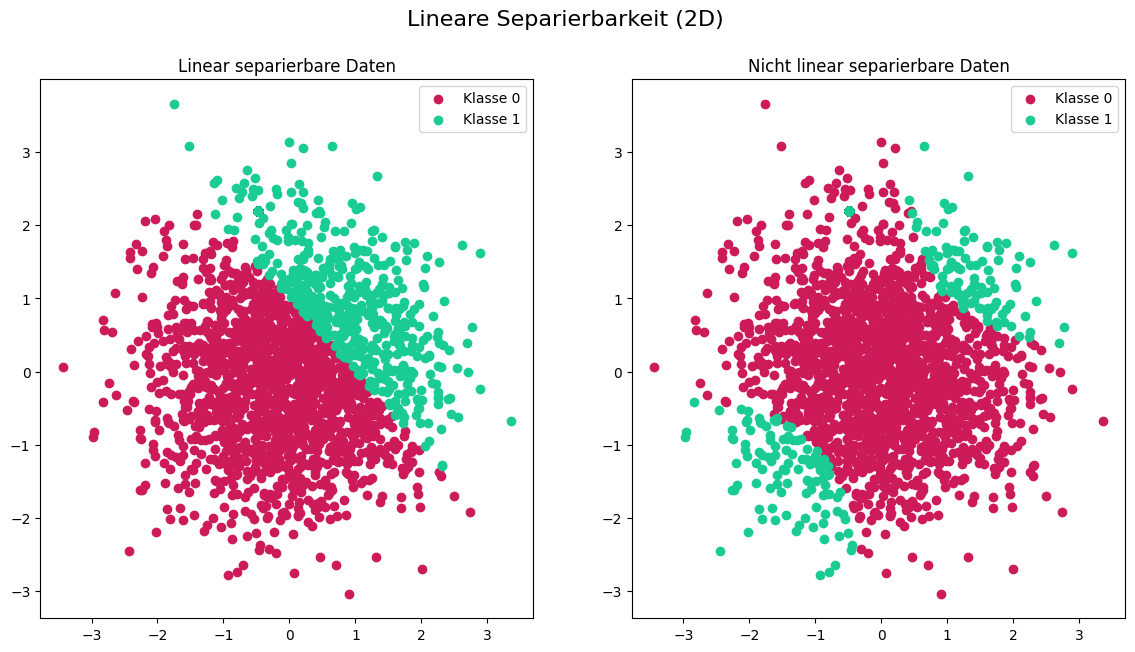

In [3]:
fig = plt.figure(figsize=(14,7))
fig.suptitle("Lineare Separierbarkeit (2D)", fontsize=16)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(x[np.where(linear_separable==0),:1],
            x[np.where(linear_separable==0),1:2],
            c="#cc1b58",
            label="Klasse 0")
ax1.scatter(x[np.where(linear_separable==1),:1],
            x[np.where(linear_separable==1),1:2],
            c="#1acc94",
            label="Klasse 1")
ax1.set_title("Linear separierbare Daten")
ax1.legend()

ax2.scatter(x[np.where(not_linear_separable==0),:1],
            x[np.where(not_linear_separable==0),1:2],
            c="#cc1b58",
            label="Klasse 0")
ax2.scatter(x[np.where(not_linear_separable==1),:1],
            x[np.where(not_linear_separable==1),1:2],
            c="#1acc94",
            label="Klasse 1")
ax2.set_title("Nicht linear separierbare Daten")
ax2.legend()
plt.show()

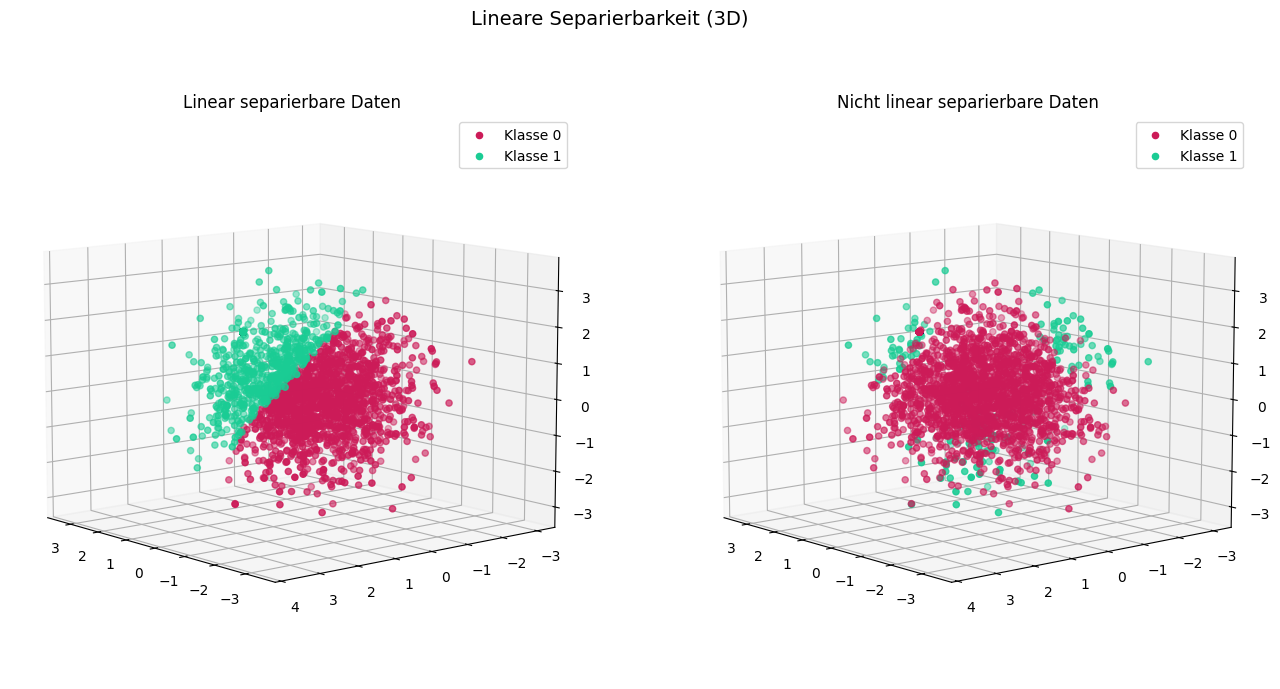

In [4]:
fig = plt.figure(figsize=(16,8))

plt.suptitle("Lineare Separierbarkeit (3D)", fontsize=14)
# Erste 3D Ansicht
ax = fig.add_subplot(1,2,1, projection='3d')
ax.scatter(x[np.where(linear_separable_3d==0),:1],x[np.where(linear_separable_3d==0),1:2],x[np.where(linear_separable_3d==0),2:],c="#CC1B58",label="Klasse 0")
ax.scatter(x[np.where(linear_separable_3d==1),:1],x[np.where(linear_separable_3d==1),1:2],x[np.where(linear_separable_3d==1),2:],c="#1ACC94",label="Klasse 1")
ax.set_title("Linear separierbare Daten")
ax.view_init(elev=10., azim=-220) #-215
ax.legend()

# Zweite 3D Ansicht
ax = fig.add_subplot(1,2,2,projection='3d')

ax.scatter(x[np.where(not_linear_separable_3d==0),:1],x[np.where(not_linear_separable_3d==0),1:2],x[np.where(not_linear_separable_3d==0),2:],c="#CC1B58",label="Klasse 0")
ax.scatter(x[np.where(not_linear_separable_3d==1),:1],x[np.where(not_linear_separable_3d==1),1:2],x[np.where(not_linear_separable_3d==1),2:],c="#1ACC94",label="Klasse 1")
ax.set_title("Nicht linear separierbare Daten")
ax.view_init(elev=10., azim=-220)
ax.legend()

plt.show()

# Support Vector Machine

## Imports

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## Datengrundlage

In [6]:
data = np.random.normal(0,1,size=(1000,2))
target = np.where((data[:,:1])**2+(data[:,1:])**2>2,0,1)

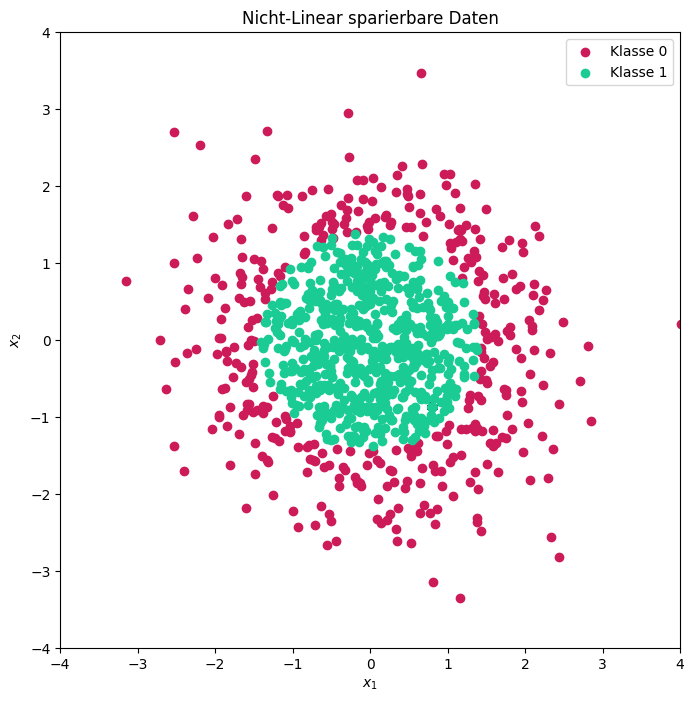

In [7]:
plt.figure(figsize=(8,8))
#plt.scatter(data[:,:1],data[:,1:],c=target)
plt.scatter(data[np.where(target==0),:1],data[np.where(target==0),1:],c="#CC1B58",label="Klasse 0")
plt.scatter(data[np.where(target==1),:1],data[np.where(target==1),1:],c="#1ACC94",label="Klasse 1")
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.title("Nicht-Linear sparierbare Daten")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

## Daten in eine höhere Dimension transformieren

In [8]:
transformed = np.concatenate([data,data[:,:1]**2+data[:,1:]**2],axis=1)

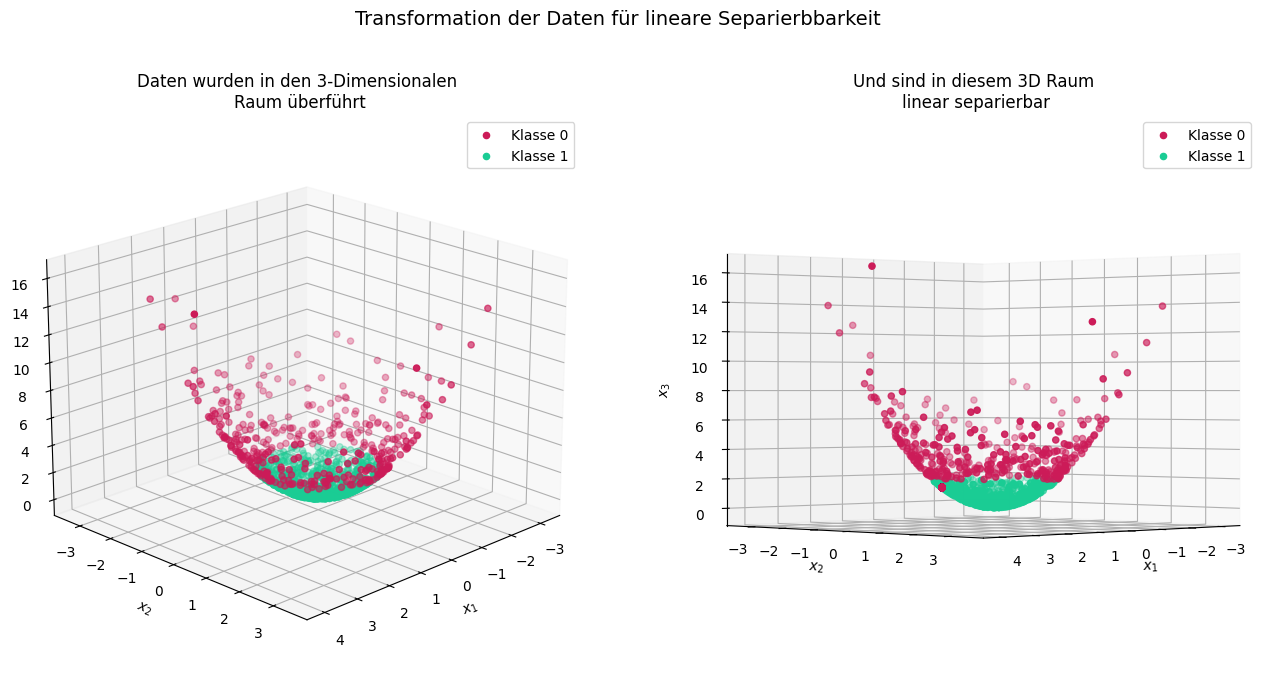

In [9]:
fig = plt.figure(figsize=(16,8))

plt.suptitle("Transformation der Daten für lineare Separierbbarkeit", fontsize=14)
# Erste 3D Ansicht
ax = fig.add_subplot(1,2,1, projection='3d')
ax.scatter(transformed[np.where(target==0),:1],transformed[np.where(target==0),1:2],transformed[np.where(target==0),2:],c="#CC1B58",label="Klasse 0")
ax.scatter(transformed[np.where(target==1),:1],transformed[np.where(target==1),1:2],transformed[np.where(target==1),2:],c="#1ACC94",label="Klasse 1")
ax.set_title("Daten wurden in den 3-Dimensionalen \nRaum überführt")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
ax.view_init(elev=20., azim=45)
ax.legend()

# Zweite 3D Ansicht
ax = fig.add_subplot(1,2,2,projection='3d')
ax.scatter(transformed[np.where(target==0),:1],transformed[np.where(target==0),1:2],transformed[np.where(target==0),2:],c="#CC1B58",label="Klasse 0")
ax.scatter(transformed[np.where(target==1),:1],transformed[np.where(target==1),1:2],transformed[np.where(target==1),2:],c="#1ACC94",label="Klasse 1")
ax.set_title("Und sind in diesem 3D Raum \nlinear separierbar")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
ax.view_init(elev=0., azim=45)
ax.legend()

plt.show()

## Die fetteste Trennlinie

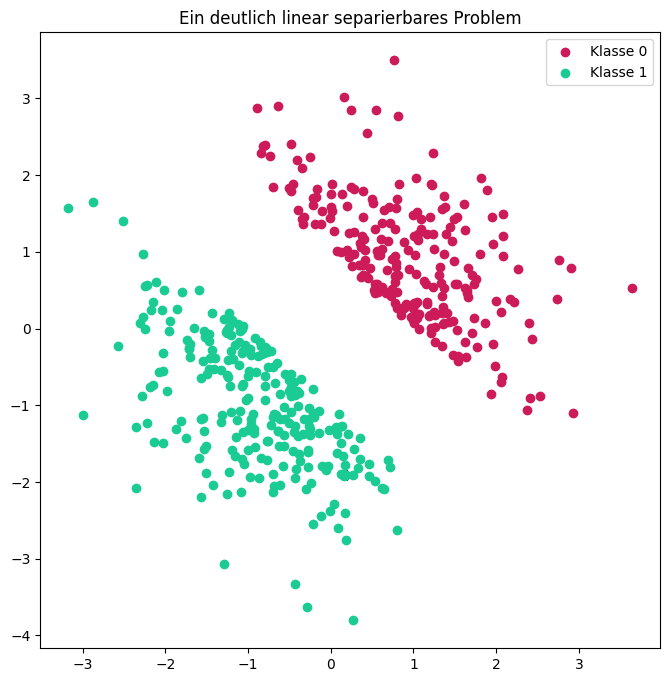

In [10]:
x = np.random.normal(0,1,size=(1000,2))
x = np.where(np.logical_or(x[:,:1]+x[:,1:]>1,x[:,:1]+x[:,1:]<-1),x,np.nan)
x = x[~np.isnan(x).any(axis=1)]
target = np.where(x[:,:1]+x[:,1:]>1,0,1)

plt.figure(figsize=(8,8))
plt.scatter(x[np.where(target==0),:1],x[np.where(target==0),1:],c="#CC1B58",label="Klasse 0")
plt.scatter(x[np.where(target==1),:1],x[np.where(target==1),1:],c="#1ACC94",label="Klasse 1")
plt.title("Ein deutlich linear separierbares Problem")
plt.legend()
plt.show()

In [ ]:
def class_line(model):
    x1_axis = np.linspace(-3,3)
    x2_axis = np.linspace(-3,3)
    z = []

    for x1i in x1_axis:
        for x2i in x2_axis:
            l = model.predict(np.array([x1i,x2i]).reshape(1, -1))
            z.append(l)

    return np.array(z).reshape(50,50)

/Users/lauraboenchen/Workspace/Digethic/full-stack-machine-learning/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


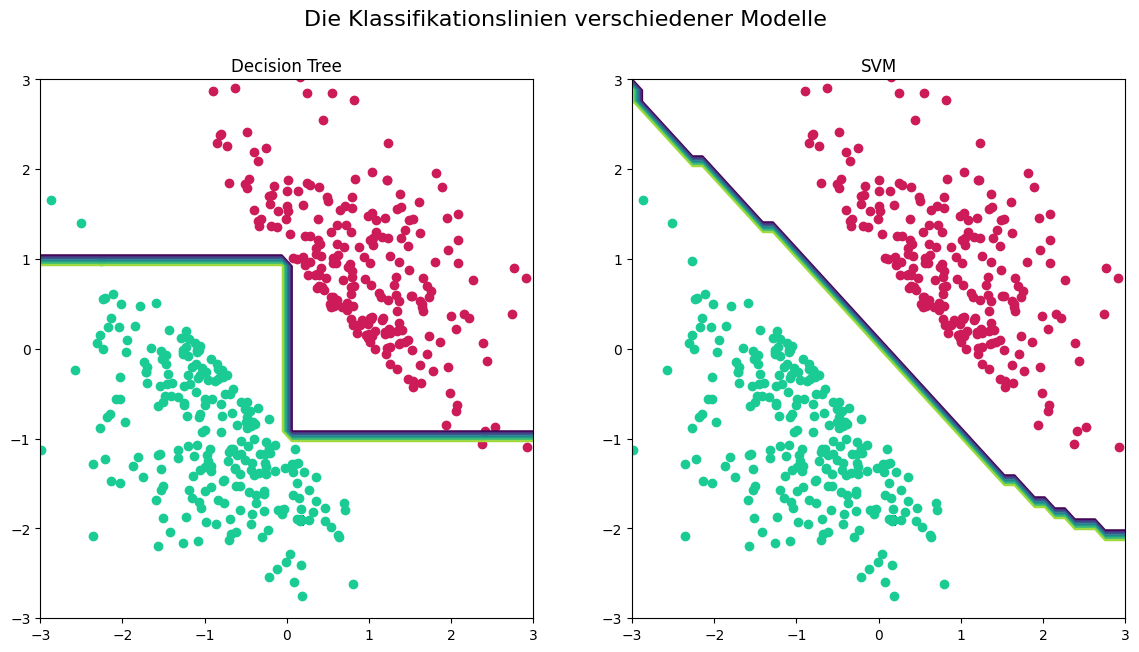

In [12]:
tree = DecisionTreeClassifier()
tree.fit(x,target)

svm = SVC()
svm.fit(x,target)


fig = plt.figure(figsize=(14,7))
fig.suptitle("Die Klassifikationslinien verschiedener Modelle", fontsize=16)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_title("Decision Tree")
ax1.scatter(x[np.where(target==0),:1],x[np.where(target==0),1:],c="#CC1B58",label="Klasse 0")
ax1.scatter(x[np.where(target==1),:1],x[np.where(target==1),1:],c="#1ACC94",label="Klasse 1")
ax1.contour(np.linspace(-3,3), np.linspace(-3,3), class_line(tree))
ax1.set_xlim(-3,3)
ax1.set_ylim(-3,3)

ax2.set_title("SVM")
ax2.scatter(x[np.where(target==0),:1],x[np.where(target==0),1:],c="#CC1B58",label="Klasse 0")
ax2.scatter(x[np.where(target==1),:1],x[np.where(target==1),1:],c="#1ACC94",label="Klasse 1")
ax2.contour(np.linspace(-3,3),np.linspace(-3,3), class_line(svm))
ax2.set_xlim(-3,3)
ax2.set_ylim(-3,3)

plt.show()


In [13]:
np.random.normal(0,1,size=(200,2))

array([[-1.12483510e+00,  4.51349382e-01],
       [-3.65844149e-01, -1.60448857e+00],
       [-6.77776067e-01,  4.49366604e-01],
       [ 9.78016696e-01, -5.44525767e-01],
       [ 2.82378160e-01,  1.38856025e+00],
       [ 1.89560910e+00,  1.56747940e-01],
       [ 1.39614348e-01, -9.21890813e-02],
       [ 2.34488714e+00,  8.58080452e-01],
       [ 3.98689066e-01,  2.56891906e+00],
       [-6.37120877e-01,  5.99306350e-03],
       [-3.43167198e-01, -5.55565515e-01],
       [ 6.61932755e-01, -8.72002211e-01],
       [-2.01446099e-01,  1.29813190e+00],
       [ 5.06133546e-02,  1.26723743e-01],
       [ 7.35986593e-01,  1.04125105e+00],
       [ 5.49934972e-01, -8.93321454e-02],
       [ 4.52041749e-01, -1.35136909e+00],
       [-5.54184025e-02,  1.17251977e+00],
       [-1.67046128e+00, -3.75778926e-01],
       [-9.98635884e-02, -2.62897271e-01],
       [-6.46652077e-01, -1.98405384e-01],
       [ 4.20142419e-02, -1.24810823e+00],
       [ 4.40060324e-01, -1.57515763e+00],
       [-2.